## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

# Махнач Федор, ИАД-3

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv", 
                   sep=",")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
data.isnull().sum().sum()

0

In [4]:
data.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

In [4]:
quantitative = ['duration', 'amount', 'age']
# Не уверен насчёт people_liable
binary = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']
ordinal = ['employment_duration', 'installment_rate', 'number_credits']
# Берём всё оставшееся
non_categorical = quantitative + binary + ordinal
categorical = [f for f in data.columns if f not in non_categorical]

print('Quantitative: ', quantitative, '\n')
print('Binary: ', binary, '\n')
print('Ordinal: ', ordinal, '\n')
print('Categorical: ', categorical, '\n')

Quantitative:  ['duration', 'amount', 'age'] 

Binary:  ['people_liable', 'telephone', 'foreign_worker', 'credit_risk'] 

Ordinal:  ['employment_duration', 'installment_rate', 'number_credits'] 

Categorical:  ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'job'] 



### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [6]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [7]:
data['housing'].unique()

array(['for free', 'rent', 'own'], dtype=object)

In [8]:
young = data[data.age < 30]
young['housing'].map(lambda x: x == 'rent').mean() * 100

66.66666666666666

In [9]:
old = data[data.age > 40]
old['housing'].map(lambda x: x == 'rent').mean() * 100

68.01470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
data['number_credits'].unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [11]:
foreigns = data[(data.foreign_worker == 'yes') & ((data.number_credits == '4-5') | (data.number_credits == '>=6'))]
foreigns

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
213,0<= ... < 200 DM,6,all credits at this bank paid back duly,others,1299,unknown/no savings account,1 <= ... < 4 yrs,>= 35,male : married/widowed,none,...,unknown / no property,74,none,rent,4-5,unemployed/unskilled - non-resident,3 or more,no,yes,good


In [12]:
foreigns.shape[0]

1

### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

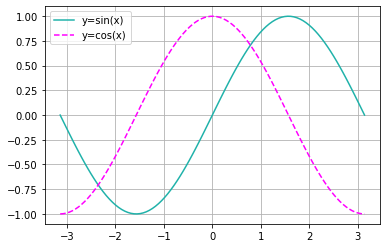

In [14]:
x = np.linspace(-np.pi, np.pi, 100)
f = np.sin(x)
g = np.cos(x)

plt.grid()
plt.plot(x, f, color='lightseagreen') 
plt.plot(x, g, linestyle='--', color='magenta')
plt.legend(['y=sin(x)', 'y=cos(x)'])
plt.show()
# Вроде похоже

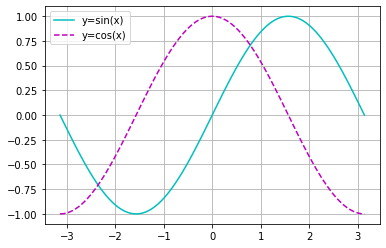

In [8]:
# Для сравнения

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [ ]:
# Спасибо, убил часа 2 на эту "зеркальную горизонтальную гистограмму"! (это не гистограмма бтв)
# Которая, видимо, в природе вообще не встречается. 
# Потому что ничего похожего в паре десятков статей по построению графиков в плотлибе и пандасе я не нашёл.
# Как, впрочем, и в семинарах, как ни удивительно.
# Нет слов, одни эмоции

Text(0.5, 0.98, 'Status of checking account')

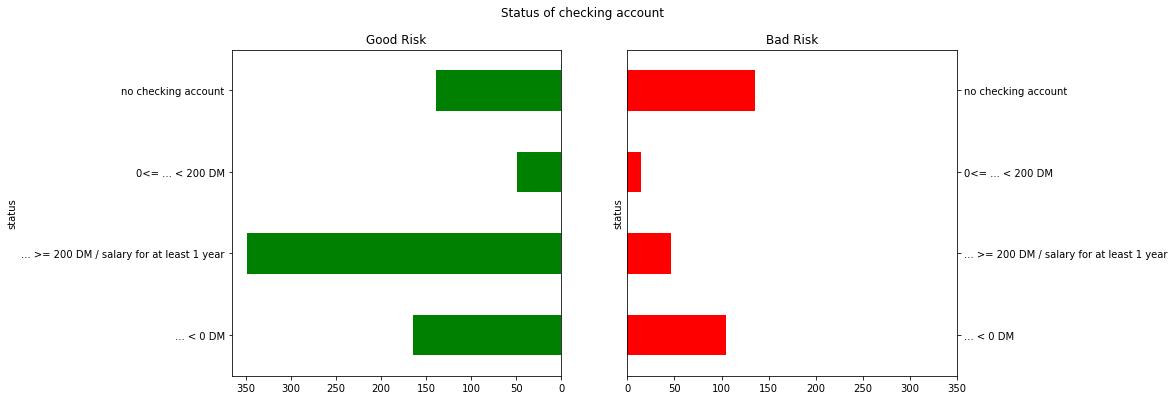

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(13,6))

df = pd.DataFrame()
# df['status'] = data['status'].unique()
df['status'] = ['... < 0 DM','... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM', 'no checking account'] 
df['count_good'] = df['status'].map(dict(data[data.credit_risk == 'good']['status'].value_counts()))
df['count_bad'] = df['status'].map(dict(data[data.credit_risk == 'bad']['status'].value_counts()))

df.plot.barh(x='status', y='count_good', title="Good Risk", color='g', legend=False, ax=axes[0]).invert_xaxis()
df.plot.barh(x='status', y='count_bad', title="Bad Risk", color='r', legend=False,  ax=axes[1])

axes[1].yaxis.tick_right()
plt.xlim(0, 350)
fig.suptitle('Status of checking account')

# Не идеально, но другие способы были ещё хуже

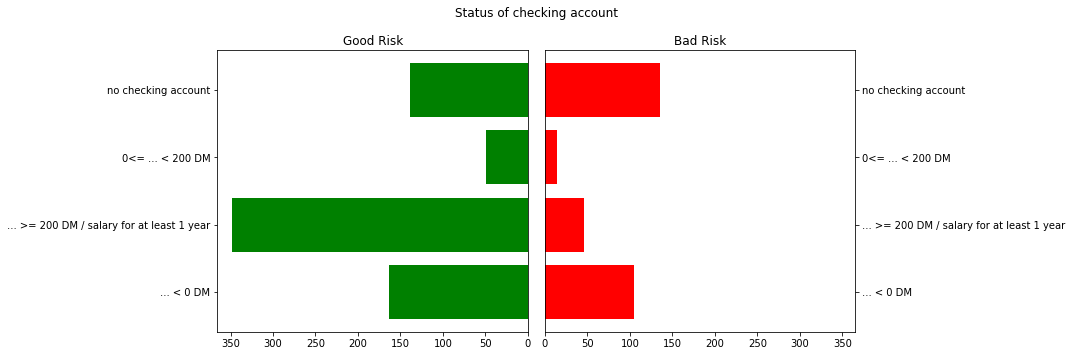

In [9]:
# Для сравнения

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot:xlabel='savings', ylabel='count'>

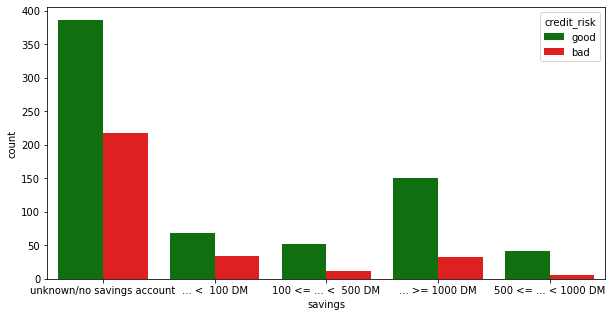

In [18]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='savings', hue='credit_risk', data=data, palette=['g', 'r'])

# По поводу вопроса о восприятии: я успел возненавидеть эти графики всей душой. 
# Потому что пока я нашёл countplot, я перепробовал 10 тысяч уродливых способов.
# Как я должен был догадаться о существовании countplot, когда его не было в семинарах - непонятно.
# Уверен, что нормальный способ есть и для 7-ой задачи,
# но видимо я просто потратил недостаточно времени на гугл (?!) чтобы его найти.

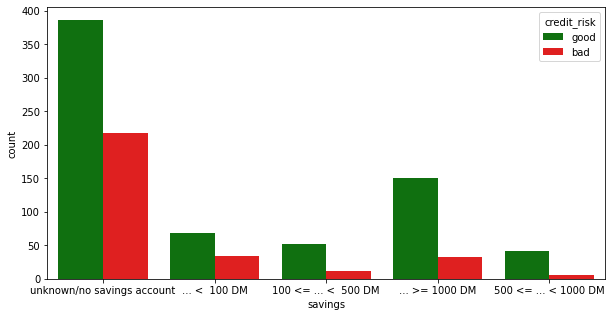

In [11]:
# Для сравнения

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

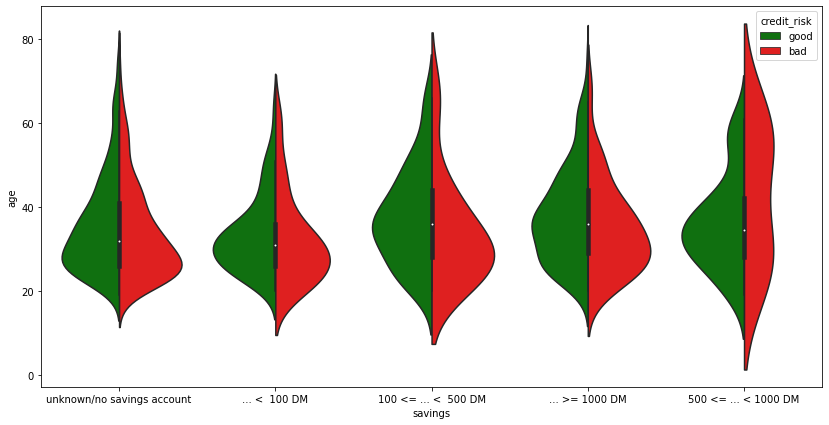

In [17]:
fig_dims = (14, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette=['g', 'r'], split=True);

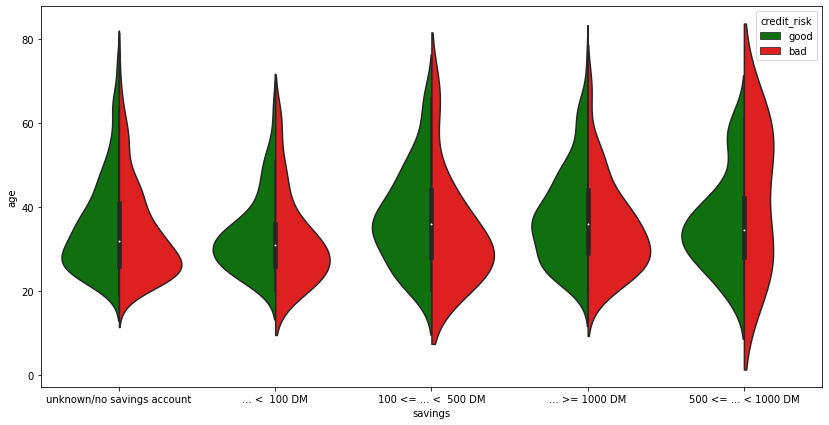

In [12]:
# Для сравнения

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

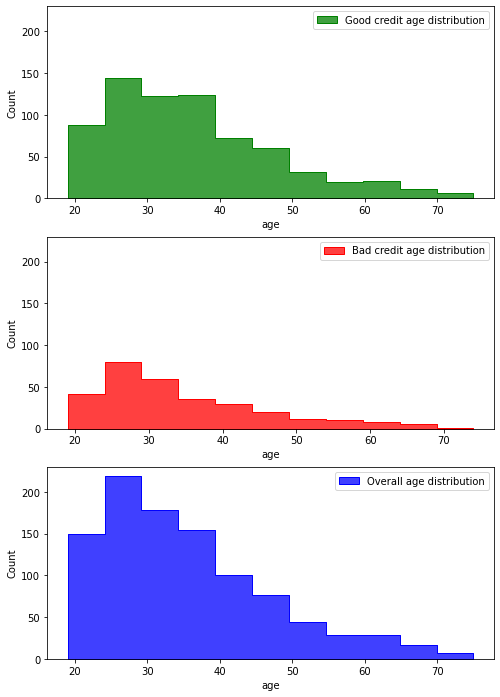

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(8,12), sharey=True)

p1 = sns.histplot(data=data[data.credit_risk == 'good'], x="age", bins=11, color='g', label='Good credit age distribution', 
                  element='step', ax=axes[0])
p2 = sns.histplot(data=data[data.credit_risk == 'bad'], x="age", bins=11, color='r', label='Bad credit age distribution', 
                  element='step', ax=axes[1])
p3 = sns.histplot(data=data, x="age", bins=11, color='blue', label='Overall age distribution', element='step', ax=axes[2])
axes[0].legend()
axes[1].legend()
axes[2].legend()

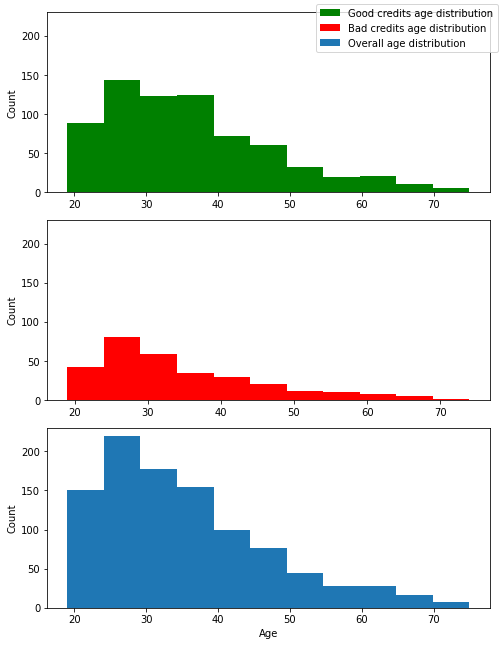

In [13]:
# Для сравнения

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

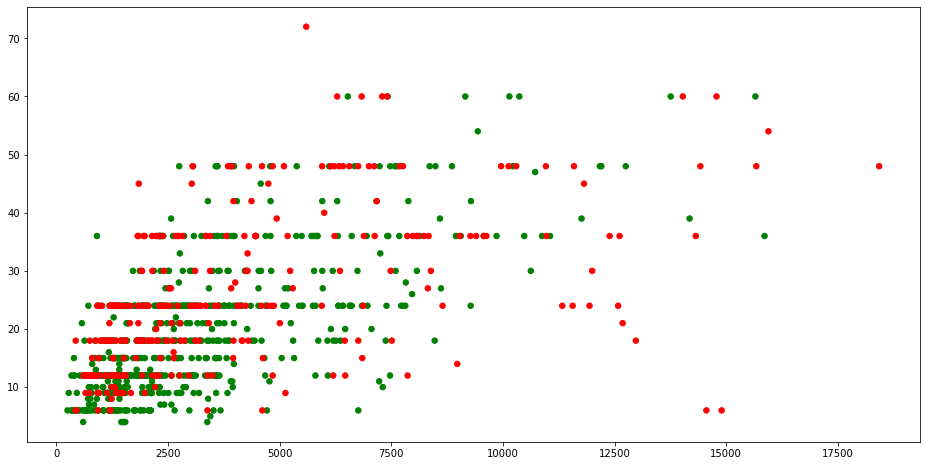

In [20]:
plt.figure(figsize=(16,8))
plt.scatter(x=data['amount'], y=data['duration'], s=30 * (data['credit_risk'] == 'good'), c='g')
plt.scatter(x=data['amount'], y=data['duration'], s=30 * (data['credit_risk'] == 'bad'), c='r')

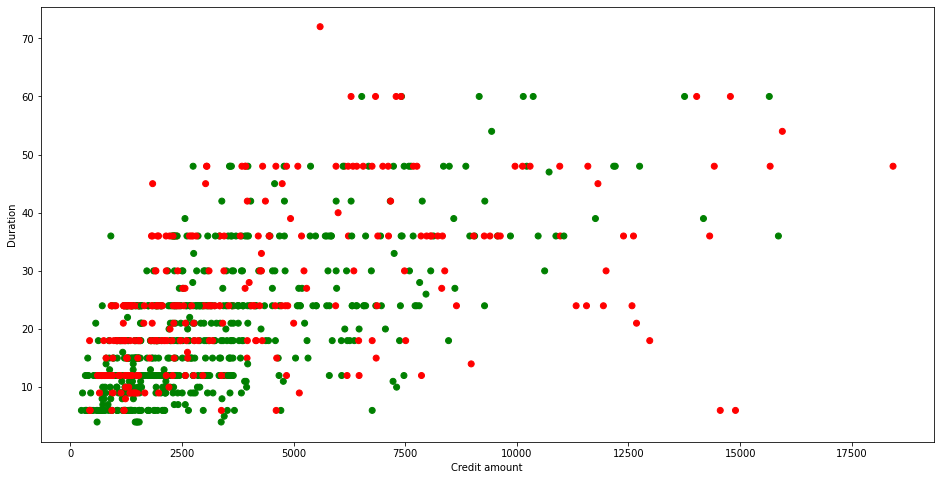

In [21]:
# Для сравнения

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

Text(0.5, 0, 'Age')

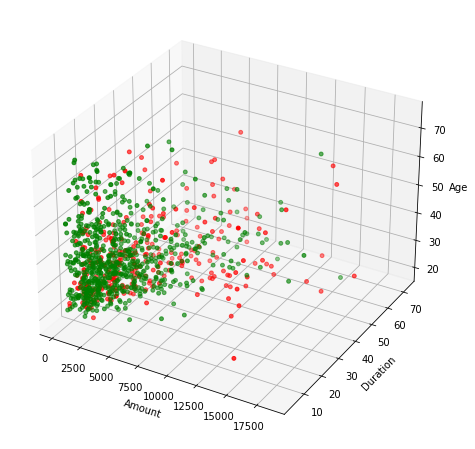

In [21]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data['amount'], ys=data['duration'], zs=data['age'], s=15 * (data['credit_risk'] == 'bad'), c='r')
ax.scatter(xs=data['amount'], ys=data['duration'], zs=data['age'], s=15 * (data['credit_risk'] == 'good'), c='g')

ax.set_xlabel('Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

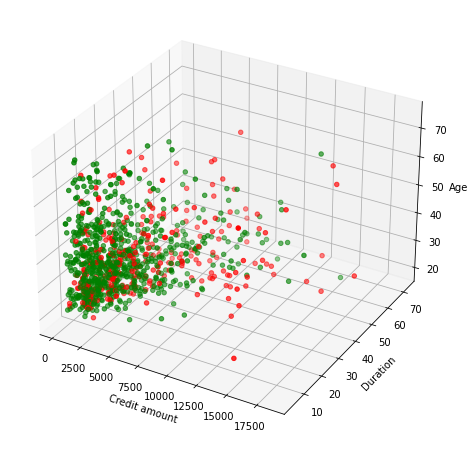

In [15]:
# Для сравнения

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [3]:
backup = data.copy()

In [5]:
# Избавляемся от категориальных признаков
data.drop(categorical, inplace=True, axis=1)
data

,duration,amount,employment_duration,installment_rate,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,< 1 yr,< 20,21,1,0 to 2,no,no,good
1,9,2799,1 <= ... < 4 yrs,25 <= ... < 35,36,2-3,3 or more,no,no,good
2,12,841,4 <= ... < 7 yrs,25 <= ... < 35,23,1,0 to 2,no,no,good
3,12,2122,1 <= ... < 4 yrs,20 <= ... < 25,39,2-3,3 or more,no,yes,good
4,12,2171,1 <= ... < 4 yrs,< 20,38,2-3,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...
995,24,1987,1 <= ... < 4 yrs,25 <= ... < 35,21,1,3 or more,no,no,bad
996,24,2303,>= 7 yrs,< 20,45,1,0 to 2,no,no,bad
997,21,12680,>= 7 yrs,< 20,30,1,0 to 2,yes (under customer name),no,bad
998,12,6468,unemployed,25 <= ... < 35,52,1,0 to 2,yes (under customer name),no,bad


In [6]:
# Пробую использовать готовый LabelEncoder. Сравнивая с предыдущей таблицей можно заметить, 
# что бинарные признаки закодировались ожидаемо, а вот порядковые придётся проставлять ручками.
from sklearn.preprocessing import LabelEncoder
data[binary + ordinal].apply(LabelEncoder().fit_transform)

,people_liable,telephone,foreign_worker,credit_risk,employment_duration,installment_rate,number_credits
0,0,0,0,1,2,2,0
1,1,0,0,1,0,1,1
2,0,0,0,1,1,1,0
3,1,0,1,1,0,0,1
4,0,0,1,1,0,2,1
...,...,...,...,...,...,...,...
995,1,0,0,0,0,1,0
996,0,0,0,0,3,2,0
997,0,1,0,0,3,2,0
998,0,1,0,0,4,1,0


In [7]:
data[binary] = data[binary].apply(LabelEncoder().fit_transform)
data

,duration,amount,employment_duration,installment_rate,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,< 1 yr,< 20,21,1,0,0,0,1
1,9,2799,1 <= ... < 4 yrs,25 <= ... < 35,36,2-3,1,0,0,1
2,12,841,4 <= ... < 7 yrs,25 <= ... < 35,23,1,0,0,0,1
3,12,2122,1 <= ... < 4 yrs,20 <= ... < 25,39,2-3,1,0,1,1
4,12,2171,1 <= ... < 4 yrs,< 20,38,2-3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
995,24,1987,1 <= ... < 4 yrs,25 <= ... < 35,21,1,1,0,0,0
996,24,2303,>= 7 yrs,< 20,45,1,0,0,0,0
997,21,12680,>= 7 yrs,< 20,30,1,0,1,0,0
998,12,6468,unemployed,25 <= ... < 35,52,1,0,1,0,0


In [8]:
# Посмотрим, какие значения есть в порядковых признаках
for feature in ordinal:
    print(feature, ":", data[feature].unique())

employment_duration : ['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']
installment_rate : ['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35']
number_credits : ['1' '2-3' '4-5' '>= 6']


In [9]:
# Сделаем корректные мапперы
ed_mapper = {v: i for i, v in enumerate(['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'])}
ir_mapper = {v: i for i, v in enumerate(['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'])}
nc_mapper = {v: i for i, v in enumerate(['1', '2-3', '4-5', '>= 6'])}

# Применим их на соответствующие столбцы
data['employment_duration'] = data['employment_duration'].map(ed_mapper)
data['installment_rate'] = data['installment_rate'].map(ir_mapper)
data['number_credits'] = data['number_credits'].map(nc_mapper)
data

,duration,amount,employment_duration,installment_rate,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,1,0,21,0,0,0,0,1
1,9,2799,2,2,36,1,1,0,0,1
2,12,841,3,2,23,0,0,0,0,1
3,12,2122,2,1,39,1,1,0,1,1
4,12,2171,2,0,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
995,24,1987,2,2,21,0,1,0,0,0
996,24,2303,4,0,45,0,0,0,0,0
997,21,12680,4,0,30,0,0,1,0,0
998,12,6468,0,2,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [15]:
class Predictor:   
    k = 19
    
    def normalize(self, row):
        return (row - row.min()) / (row.max() - row.min())
    
    def distance(self, train_row, row):
        row = (row - self.mins) / self.minmax
        return np.linalg.norm(train_row[:-1] - row)
    
    def row_predict(self, row):
        sorted_train = sorted(self.train, key=lambda x: self.distance(x, row))
        sorted_train = np.array(sorted_train)
        nearest = sorted_train[:self.k]
        n_good = nearest[:, -1].sum()
        return n_good >= (self.k / 2)
    
    def learn(self, X_train, y_train):
        self.mean = np.apply_along_axis(lambda col: col.mean(), 0, X_train)
        self.std = np.apply_along_axis(lambda col: col.std(), 0, X_train)
        self.train = (X_train.copy() - self.mean) / self.std
        self.train = np.hstack((self.train, np.array([y_train]).T))        
    
    def predict(self, Xtest: np.array) -> np.array:
        return np.apply_along_axis(lambda row: self.row_predict(row), 1, Xtest)

In [13]:
backup2 = data.copy()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение

predictor = Predictor()
predictor.learn(X_train, y_train)

for ik in range(4, 50):
    predictor.k = ik
    re = accuracy_score(y_test, predictor.predict(X_test))
    print(f'k = {ik}, acc = {re}')

#accuracy_score(y_test, predictor.predict(X_test))

k = 4, acc = 0.668
k = 5, acc = 0.704
k = 6, acc = 0.684
k = 7, acc = 0.688
k = 8, acc = 0.708
k = 9, acc = 0.688
k = 10, acc = 0.696
k = 11, acc = 0.68
k = 12, acc = 0.684
k = 13, acc = 0.676
k = 14, acc = 0.672
k = 15, acc = 0.692
k = 16, acc = 0.692
k = 17, acc = 0.684
k = 18, acc = 0.684
k = 19, acc = 0.696
k = 20, acc = 0.7
k = 21, acc = 0.708
k = 22, acc = 0.692
k = 23, acc = 0.696
k = 24, acc = 0.68
k = 25, acc = 0.684
k = 26, acc = 0.676
k = 27, acc = 0.676
k = 28, acc = 0.664
k = 29, acc = 0.672
k = 30, acc = 0.668
k = 31, acc = 0.672
k = 32, acc = 0.672
k = 33, acc = 0.672


KeyboardInterrupt: 